# Finding the Best Markets for E-learning Company
---

In this project we assume that we are working for an e-learning company. The company provides programming courses. Most of the courses are on web and mobile development, however we will also cover many other domains (data science, game development etc.). Our company invests some money in advertisment in order to promote products. 

The main goal of this project is to find out the two best markets to advertise the products in.

We will work on data coming from free e-learning platform offering courses on web development: [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). The platform runs a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

We can find the survey data in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Exploring the Survey Dataset

We will begin with reading in the dataset and we would like to perform an initial data exploration.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the data for our analysis
survey = pd.read_csv('projects_dq\\Survey\\2017-fCC-New-Coders-Survey-Data.csv', encoding='ISO-8859-1', low_memory=False)

# Exploring the dataset
pd.options.display.max_columns = 150 # to avoid truncated output 
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
# Finding the number of rows and columns
print('Number of rows and columns:')
survey.shape

Number of rows and columns:


(18175, 136)

There are 18175 rows and 136 columns in our survey dataset. We would like to know what type of courses would be of the biggest interest. For sure `JobInterest` columns would be helpful. Another thing regards the time clients spend studying (`HoursLearning`), place where the coders are located (`CityPopulation`, `LanguageAtHome`) and how much money they are willing o spend on learing (`MoneyForLearning`).

## Sample Representativity

In this part of the project we will check whether our dataset is representative for the population of interest and if it has the right categories of people for our purpose. In the `JobRoleInterest` column we can find information regarding preferred participant role. We will generate a frequency table for this column.

In [3]:
# Role frequency in percentage form
survey['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                          11.770595
  Front-End Web Developer                                                                                                                                                                          6.435927
  Data Scientist                                                                                                                                                                                   2.173913
Back-End Web Developer                                                                                                                                                                             2.030892
  Mobile Developer                                                                                                                                                                      

Almost 12% survey participants are interested in career as a Full-Stack Web Developer. Quite a large number of them thinks about Front-End Web Developer (over 6%), a little bit less about Data Scientist role (over 2%). Looking at the bottom we can see many outcomes showing many subjects, indicating that the survey participants are also interested in many subjects.  Because our company offers various courses, it is a good information.

We will divide the students into two groups (one with those willing to study only one chosen course and second group for students interested in multiple subjects) and visualise our outcomes using a pie plot.

Sum of students willing to do multiple courses: 4779
The number of all students: 18175
The number of students willing to do one course: 13396


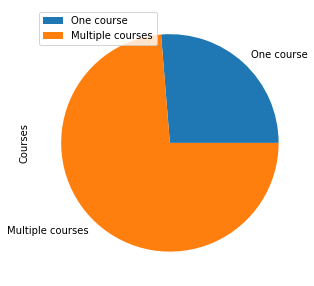

In [4]:
# Checking the number of students in each group
multiple_courses = survey['JobRoleInterest'].str.contains(',')
print('Sum of students willing to do multiple courses:', multiple_courses.sum())

all_choices = survey['JobRoleInterest'].shape[0]
print('The number of all students:', all_choices)

just_one = all_choices - multiple_courses.sum()
print('The number of students willing to do one course:', just_one)

# Plotting a pie plot
df = pd.DataFrame({'Courses': [multiple_courses.sum(), just_one]}, index=['One course', 'Multiple courses'])
plot = df.plot.pie(y='Courses', figsize=(5, 5))

As presented above, most students are interested in multiple number of courses. It make sense to offer a variety of courses then. The question is whether the sample is still representative. In our courses we put a significant emphasis on mobile and web development.

In [5]:
# Generating a frequency table
web_or_mobile = survey['JobRoleInterest'].str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


Very many survey participants choose web or mobile related subjects (over 86%). Therefore, the sample is representative.

## Location of the Potential Customers 

In this part of the project we will analyse our potential clients' locations. We would like to understand in which countries the number and density of the customers are the highest. Then we would like to choose two countries and advertise our products there.  

We will use `CountryLive` variable as it indicates where the customers live at the moment. 

To ensure the sample representativity, we will begin with dropping the rows where participants did not provide what roles they are interested in.

In [6]:
# Dropping columns with empty values
survey_clean = survey[survey['JobRoleInterest'].notnull()].copy()

In [7]:
# Generating absolute and relative frequencies
absolute_freq = survey_clean['CountryLive'].value_counts()
total = survey_clean['CountryLive'].shape[0]
calculation = survey_clean['CountryLive'].value_counts() * 100
relative_freq = calculation / total
print('Absolute Frequencies')
absolute_freq.head()

Absolute Frequencies


United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

In [8]:
relative_freq = round(relative_freq, 2)
print('Relative frequency (%)')
relative_freq.head()

Relative frequency (%)


United States of America    44.69
India                        7.55
United Kingdom               4.51
Canada                       3.72
Poland                       1.87
Name: CountryLive, dtype: float64

Our potential clients are mainly from the US (3075 people, that is almost 45%). We will definitely advertise our products in the United States. Second, much smaller group that we could choose, is located in India. However, are people in India likely to spend more money on learning from Brits or Canadians? We will answer these questions in the further research.

## The Detailed Analysis of the most Promising Markets

In the previous part of the project we found out that our potential customers are mainly located in the US. Without a doubt, United States should be a great place to advertise our products. However, we would like to choose one more contry. We are unsure whether India, United Kingdom, Canada or Poland would be the best choice. 

In this part of the project we will check how much money people living in these three countries would like to spend on learning.

The MoneyForLearning column informs about the amount of money in American dollars spent by participants from the moment they started coding until the moment they completed the survey. In order to receive reliable results we will divide the MoneyForLearning column to the MonthsProgramming column.

In [9]:
# Calculating the MoneyForLearning per month
survey['MoneyForLearning'] = survey['MoneyForLearning']/survey['MonthsProgramming']

Our company sells subscriptions at a price of $59 per month, so we would like to know how many students are willing to spend that much money.

|Condition||Label|
|----||----|
|0||free learning|
|0 <= money < 40||little money|
|40 <= money < 100||some money|
|100 <= money < 1000||a lot of money|
|1000 <= money < 50000||plenty of money|
|money >= 50000||unlikely a lot of money|


In [32]:
# Writing a function for ordinal scale
def make_amounts_ordinal(row):
    if row['MoneyForLearning'] == 0:
        return 'free learning'
    if (0 <= row['MoneyForLearning'] < 40):
        return 'little money'
    if (40 <= row['MoneyForLearning'] < 100):
        return 'some money'
    if (100 <= row['MoneyForLearning'] < 1000):
        return 'a lot of money'
    if (1000 <= row['MoneyForLearning'] < 50000):
        return 'plenty of money'
    else:
        return 'unlikely a lot of money'
    
    
# Applying the function
survey['MoneyForLearningOrdinal'] = survey.apply(make_amounts_ordinal, axis=1)
print(survey['MoneyForLearningOrdinal'].value_counts())

free learning              7278
little money               5121
unlikely a lot of money    2552
a lot of money             1651
some money                 1131
plenty of money             442
Name: MoneyForLearningOrdinal, dtype: int64


We can observe that the most survey participants are willing to spend less than $40. In order to better understand the above findings, we will visualise the outcomes. There is a little group willing to pay some money.

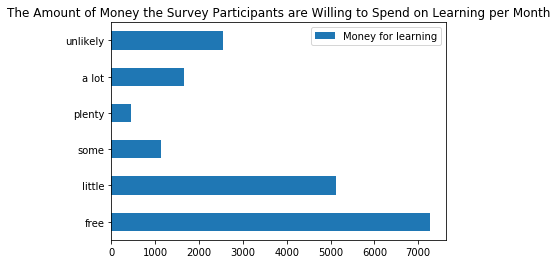

In [34]:
# Assigning ordinal scale amounts to variables
free_learning = (survey['MoneyForLearningOrdinal'] == 'free learning').sum()
little_money = (survey['MoneyForLearningOrdinal'] == 'little money').sum()
some_money = (survey['MoneyForLearningOrdinal'] == 'some money').sum()
plenty_money = (survey['MoneyForLearningOrdinal'] == 'plenty of money').sum()
a_lot_of_money = (survey['MoneyForLearningOrdinal'] == 'a lot of money').sum()
unlikely_a_lot = (survey['MoneyForLearningOrdinal'] == 'unlikely a lot of money').sum()

# Plotting a barh plot for a comparision
money_learning_ordinal = [free_learning, little_money, some_money, plenty_money, a_lot_of_money, unlikely_a_lot]
index = ['free', 'little', 'some', 'plenty', 'a lot', 'unlikely']
df= pd.DataFrame({'Money for learning': money_learning_ordinal}, index=index)
ax = df.plot.barh(rot=0, title ='The Amount of Money the Survey Participants are Willing to Spend on Learning per Month')

The most students are willing to learn for free. The second biggest group are survey participants who want to spend money but less than \\$40. We can see that there is a group of students who informed that they are willing to spend more than \\$50,000 a month. We assume this is quite unlikely. Because subscription on our website costs \\$59, we would be most interested in students who are willing to spend 'some money' (i.e. more than $40 and less than \\$100). We will investigate how the situation looks like in the case of India, United Kingdom, Canada and Poland.

### The United States of America

In [54]:
# Filtering for the US
us = survey['CountryLive'] == 'United States of America'
survey[us].head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningOrdinal,money_per_month
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",13.333333,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,little money,2.222222
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",200.000000,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,N

In [55]:
# Grouping the results
grouped_us = survey[us].groupby('CountryLive')['MoneyForLearningOrdinal'].value_counts()
print(grouped_us)

CountryLive               MoneyForLearningOrdinal
United States of America  free learning              2134
                          little money               1685
                          a lot of money              751
                          unlikely a lot of money     557
                          some money                  444
                          plenty of money             220
Name: MoneyForLearningOrdinal, dtype: int64


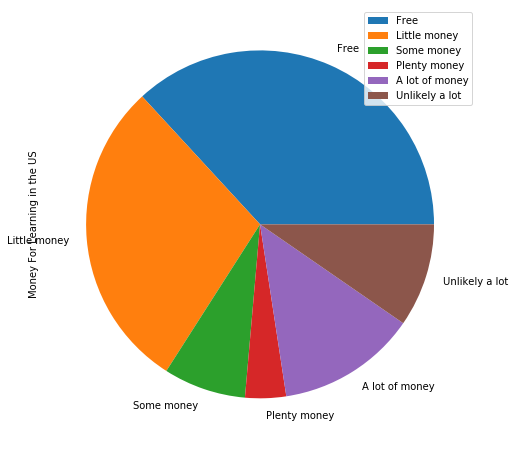

In [63]:
free_us = 2134
little_us = 1685
some_us = 444
plenty_us = 220
a_lot_us = 751
unlikely_us = 557

# Plotting a pie plot
df_us = pd.DataFrame({'Money For Learning in the US': [free_us, little_us, some_us, plenty_us, a_lot_us, unlikely_us]}, index=['Free', 'Little money', 'Some money', 'Plenty money', 'A lot of money', 'Unlikely a lot'])
plot_us = df_us.plot.pie(y='Money For Learning in the US', figsize=(8, 8))


In the US we can observe that there is a big group of learners willing to earn for free, spend little and a lot of money.

### India

In [12]:
# Filtering for India
india = survey['CountryLive'] == 'India'
survey[india].head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningOrdinal
48,19.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Doing an unpaid internship,NaN,NaN,NaN,1.0,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,20.0,b74d7cf066c9124494fe33c4cf3c9bd1,e1938af6b393fc97a11088f21fd3ae23,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Punjabi,"single, never married",0.0,48.0,9560185262,2017-03-09 02:35:09,2017-03-09 02:30:31,2017-03-09 02:37:16,2017-03-09 02:35:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Siraj Raval Youtube channel,NaN,NaN,1.0,NaN,1.0,NaN,NaN,some high school,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,little money
49,23.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 60 minutes,India,India,software development and IT,NaN,Employed for wages,NaN,NaN,0.0,1.0,male,NaN,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,5.0,3021be59a584d55d47c40183f6c12654,ed6b75f4926aebe9b029bcc75c84c328,6000.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hindi,"single, never married",0.0,10.0,6ca1c29e57,2017-03-09 02:35:09,2017-03-09 02:32:29,2017-03-09 02:39:17,2017-03-09 02:35:16,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,bachelor's degree,Electrical Engineering,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,little money
52,21.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN

In [35]:
# Grouping the results
grouped_india = survey[india].groupby('CountryLive')['MoneyForLearningOrdinal'].value_counts()
print(grouped_india)

CountryLive  MoneyForLearningOrdinal
India        free learning              684
             little money               357
             unlikely a lot of money    194
             a lot of money              77
             some money                  66
             plenty of money             22
Name: MoneyForLearningOrdinal, dtype: int64


We can observe, that the most survey participants from India are willing to spend little money. We will plot the outcomes and calculate proportions for easier comparison later.

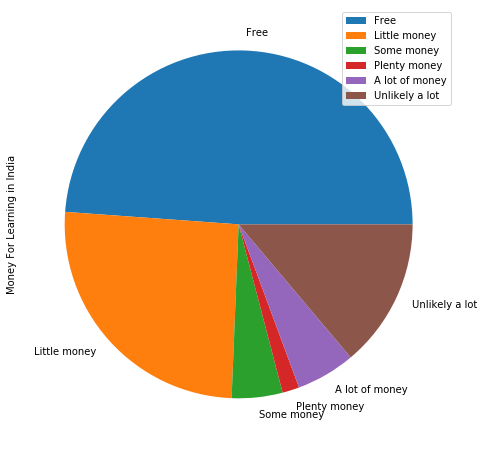

In [37]:
free_india = 684
little_india = 357
some_india = 66
plenty_india = 22
a_lot_india = 77
unlikely_a_lot = 194

# Plotting a pie plot
df_india = pd.DataFrame({'Money For Learning in India': [free_india, little_india, some_india, plenty_india, a_lot_india, unlikely_a_lot]}, index=['Free', 'Little money', 'Some money', 'Plenty money', 'A lot of money', 'Unlikely a lot'])
plot_india = df_india.plot.pie(y='Money For Learning in India', figsize=(8, 8))

Quite a big group of students in India are willing to spend more than 50,000$ a month for learning. We are quite cautious regarding that group and consider it rather unlikely. 

### Canada

In [15]:
# Filtering for Canada
canada = survey['CountryLive'] == 'Canada'
survey[canada].head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningOrdinal
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,25.000000,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,little money
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Canada,NaN,NaN,Unable to work,NaN,NaN,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,12.0,1847ab8a8ad29489407379c3fb6241d9,ea9c5eda6cf40ffccdbb957e83b01f6b,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freelance,NaN,NaN,NaN,English,"single, never married",16.666667,12.0,2bb3e97ae9,2017-03-09 00:45:23,2017-03-09 00:39:35,2017-03-09 00:47:34,2017-03-09 00:45:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,some high school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0,little money
24,26.0,1.0,1.0,0.0,HackerYou,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Can

In [38]:
grouped_canada = survey[canada].groupby('CountryLive')['MoneyForLearningOrdinal'].value_counts()
print(grouped_canada)

CountryLive  MoneyForLearningOrdinal
Canada       free learning              260
             little money               175
             a lot of money              67
             unlikely a lot of money     54
             some money                  36
             plenty of money             24
Name: MoneyForLearningOrdinal, dtype: int64


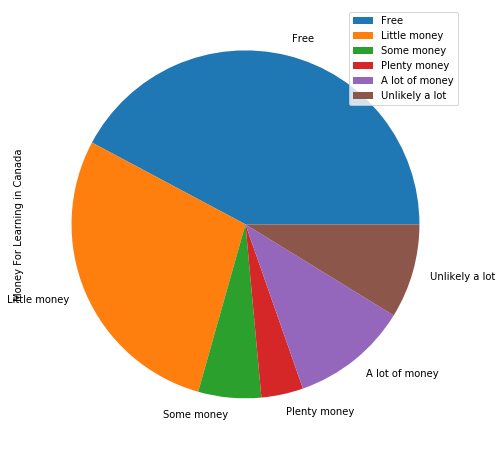

In [40]:
free_canada = 260
little_canada = 175
some_canada = 36
plenty_canada = 24
a_lot_canada = 67
unlikely_canada = 54

# Plotting a pie plot
df_canada = pd.DataFrame({'Money For Learning in Canada': [free_canada, little_canada, some_canada, plenty_canada, a_lot_canada, unlikely_canada]}, index=['Free', 'Little money', 'Some money', 'Plenty money', 'A lot of money', 'Unlikely a lot'])
plot_canada = df_canada.plot.pie(y='Money For Learning in Canada', figsize=(8, 8))

The results for Canada are interesting. 'Some money' group, in which we would be most interested in, is small. However, the group 'A lot of money' which is close to our group is quite big. Actually the distribution looks quite similar in the US.

### United Kingdom

In [18]:
# Filtering for the United Kingdom 
uk = survey['CountryLive'] == 'United Kingdom'
survey[uk].head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningOrdinal
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,30 to 44 minutes,United Kingdom,United Kingdom,NaN,Market research,Employed for wages,NaN,30000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,120000.0,16.0,5e130f133306abd6c2f9af31467ff37c,fe5e9f175fdfbf18bcf6c85d6e042b68,40000.0,NaN,0.0,0.0,0.0,I'm already applying,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,Full-Stack Web Developer,no preference,English,married or domestic partnership,0.000000,12.0,f4abfae20d,2017-03-09 00:45:33,2017-03-09 00:41:27,2017-03-09 00:48:49,2017-03-09 00:45:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Sololearn,1.0,NaN,1.0,NaN,NaN,NaN,1.0,"some college credit, no degree",NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,little money
22,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Portugal,United Kingdom,software development and IT,NaN,Employed for wages,NaN,48600.0,0.0,NaN,female,NaN,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,5.0,9d14d7e88d3bb03fa51d49b53b923596,335f504943d112779366ea89ace235cf,46700.0,0.0,0.0,0.0,1.0,I haven't decided,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,Full-Stack Web Developer,in an office with other developers,Portuguese,"single, never married",285.714286,14.0,51887f00cd,2017-03-09 01:14:44,2017-03-09 01:10:27,2017-03-09 01:18:37,2017-03-09 01:14:47,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,master's degree (non-professio

In [41]:
# Grouping the results
grouped_uk = survey[uk].groupby('CountryLive')['MoneyForLearningOrdinal'].value_counts()
print(grouped_uk)

CountryLive     MoneyForLearningOrdinal
United Kingdom  free learning              310
                little money               244
                unlikely a lot of money     81
                some money                  60
                a lot of money              50
                plenty of money             12
Name: MoneyForLearningOrdinal, dtype: int64


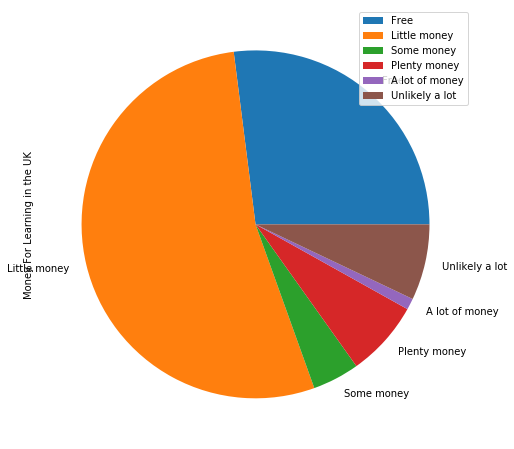

In [65]:
free_uk = 310
little_uk = 614
some_uk = 50
plenty_uk = 81
a_lot_uk = 12
unlikely_uk = 81

# Plotting a pie plot
df_uk = pd.DataFrame({'Money For Learning in the UK': [free_uk, little_uk, some_uk, plenty_uk, a_lot_uk, unlikely_uk]}, index=['Free', 'Little money', 'Some money', 'Plenty money', 'A lot of money', 'Unlikely a lot'])
plot_uk = df_uk.plot.pie(y='Money For Learning in the UK', figsize=(8, 8))

The UK outcome is definitely different from previous India and Canada results. We can notice that here the most popular group is not made of free learners but students, who are willing to spend money. However, our subscription could be too expensive.

### Poland

In [21]:
# Filtering for Poland
poland = survey['CountryLive'] == 'Poland'
survey[poland].head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearningOrdinal
136,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poland,Poland,NaN,NaN,Not working and not looking for work,NaN,15000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,50.0,6f3a30a3874e51231d0584d0f887a6a5,8a2d7c59bafd790c2813b5c0440820b5,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,Full-Stack Web Developer,from home,Polish,"single, never married",NaN,5.0,16f111cb65,2017-03-09 07:56:01,2017-03-09 07:51:04,2017-03-09 07:58:38,2017-03-09 07:56:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,master's degree (non-professional),Statistics,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unlikely a lot of money
143,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Less than 15 minutes,Poland,Poland,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,1.0,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,4.0,8c82d9c4fe687a540dde405fe580f212,87678fb410b0cde7dcbfda5306f008dd,20000.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polish,married or domestic partnership,0.000000,20.0,e599827553,2017-03-09 08:15:40,2017-03-09 08:12:53,2017-03-09 08:18:14,2017-03-09 08:15:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,little money
149,21.0,0.0,NaN,NaN,NaN,NaN,NaN

In [47]:
grouped_poland = survey[poland].groupby('CountryLive')['MoneyForLearningOrdinal'].value_counts()
print(grouped_poland)

CountryLive  MoneyForLearningOrdinal
Poland       free learning              112
             little money                86
             unlikely a lot of money     23
             a lot of money              22
             some money                  17
             plenty of money              5
Name: MoneyForLearningOrdinal, dtype: int64


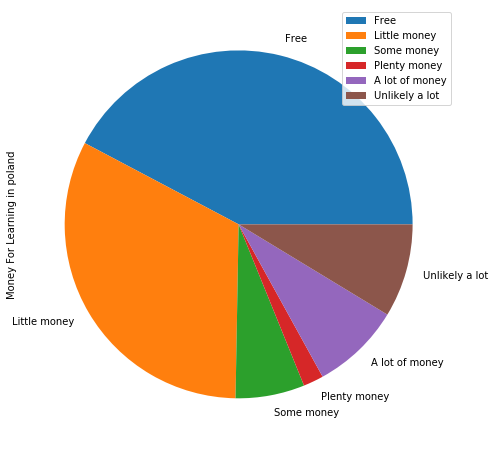

In [50]:
free_poland = 112
little_poland = 86
some_poland = 17
plenty_poland = 5
a_lot_poland = 22
unlikely_poland = 23

# Plotting a pie plot
df_poland = pd.DataFrame({'Money For Learning in poland': [free_poland, little_poland, some_poland, plenty_poland, a_lot_poland, unlikely_poland]}, index=['Free', 'Little money', 'Some money', 'Plenty money', 'A lot of money', 'Unlikely a lot'])
plot_poland = df_poland.plot.pie(y='Money For Learning in poland', figsize=(8, 8))

In Poland most students want to learn for free. There is quite a nice proportion of people willing to spend money on learning, however, the amount of potential clients is low.

# Findings
---


Because our subscription costs \\$59, we would like to choose a country with the biggest amount of students who are:
- willing to spend money for learning;
- perfectly they should fit 'some money' group.

In every investigated country there was quite a small proportion of students willing to pay more than \\$40 and less than \\$100. We believe, it would be possible to convince some students from 'little money' group to buy our product. Also the survey participants interested in spending more than \\$100 should be interested. 

Without a doubt, the biggest proportion of students who are willing to spend more than 100$ (a lot of money and plenty of money group - we exclude unlikely group here) comes from Canada. Although, the choice is not clear - in India the number of potential clients might be higher than in Canada, due to higher GDP in Canada we should be able to convice students from groups 'free learning' and 'little money' to actually give us a try. 

Furthermore, the advertisment strategy for the US and Canada could be almost the same - the proportion of students willing to spend a particular amount of money is similar. We are convinced that advertising our product in India would be far more challenging and therefore expensive.

An interesting market could be actually the United Kingdom. It stands out among the other researched countries due to smallest proportion of students willing to learn for free. Nevertheless, the students are rather willing to pay less than \\$40. Our subscription is more expensive. If we lowered the price the choice would be the UK. In the current situation we stay by Canada.